In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
data_path = './data/ejercicio_1.csv'

In [3]:
serie_temp = pd.read_csv(data_path)

In [4]:
serie_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mes      67 non-null     object
 1   Serie 1  67 non-null     object
 2   Serie 2  67 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [5]:
serie_temp['Mes'].unique()

array(['ene-16', 'feb-16', 'mar-16', 'abr-16', 'may-16', 'jun-16',
       'jul-16', 'ago-16', 'sep-16', 'oct-16', 'nov-16', 'dic-16',
       'ene-17', 'feb-17', 'mar-17', 'abr-17', 'may-17', 'jun-17',
       'jul-17', 'ago-17', 'sep-17', 'oct-17', 'nov-17', 'dic-17',
       'ene-18', 'feb-18', 'mar-18', 'abr-18', 'may-18', 'jun-18',
       'jul-18', 'ago-18', 'sep-18', 'oct-18', 'nov-18', 'dic-18',
       'ene-19', 'feb-19', 'mar-19', 'abr-19', 'may-19', 'jun-19',
       'jul-19', 'ago-19', 'sep-19', 'oct-19', 'nov-19', 'dic-19',
       'ene-20', 'feb-20', 'mar-20', 'abr-20', 'may-20', 'jun-20',
       'jul-20', 'ago-20', 'sep-20', 'oct-20', 'nov-20', 'dic-20',
       'ene-21', 'feb-21', 'mar-21', 'abr-21', 'may-21', 'jun-21',
       'jul-21'], dtype=object)

In [6]:
serie_temp['Mes'].nunique()
# RangeIndex: 67 entries, 0 to 66

67

In [7]:
serie_temp['Serie 1'].isnull().sum()

np.int64(0)

In [8]:
serie_temp['Serie 2'].isnull().sum()

np.int64(0)

In [9]:
# serie_temp[['Serie 1','Serie 2']].plot(kind='hist')

In [10]:
serie_temp['Serie 1']=serie_temp['Serie 1'].str.replace(',', '').astype(float)

In [11]:
serie_temp['Serie 2']=serie_temp['Serie 2'].str.replace(',', '').astype(float)

In [12]:
serie_temp['Serie 1'].isnull().sum()

np.int64(0)

In [13]:
serie_temp['Serie 2'].isnull().sum()

np.int64(0)

<Axes: >

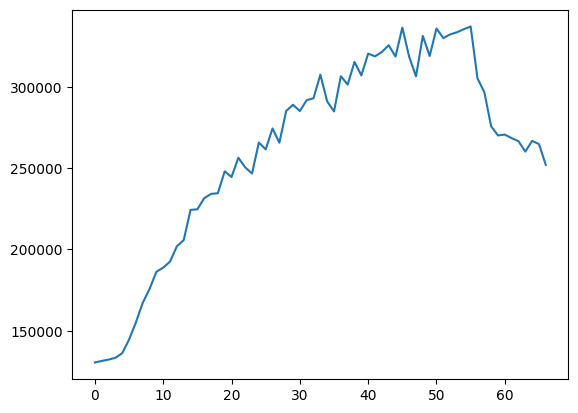

In [14]:
serie_temp['Serie 1'].plot()

<Axes: >

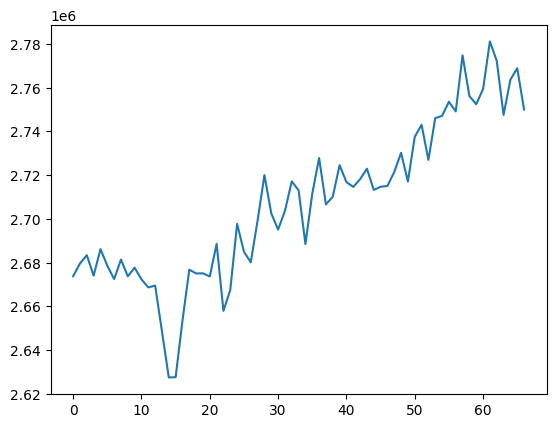

In [15]:
serie_temp['Serie 2'].plot()

<Axes: >

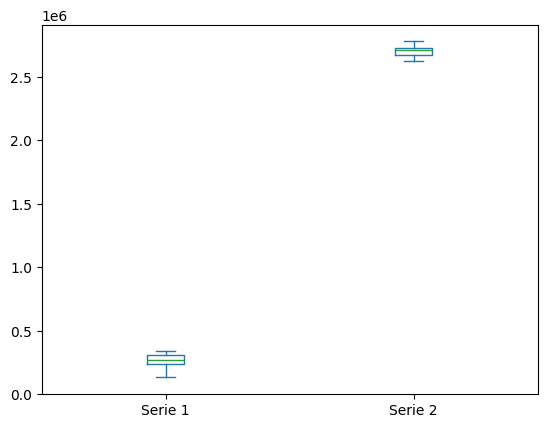

In [16]:
serie_temp[['Serie 1','Serie 2']].plot(kind='box')

<Axes: >

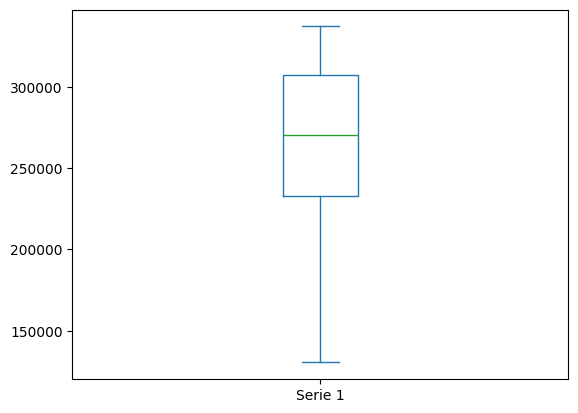

In [17]:
serie_temp['Serie 1'].plot(kind='box')

<Axes: >

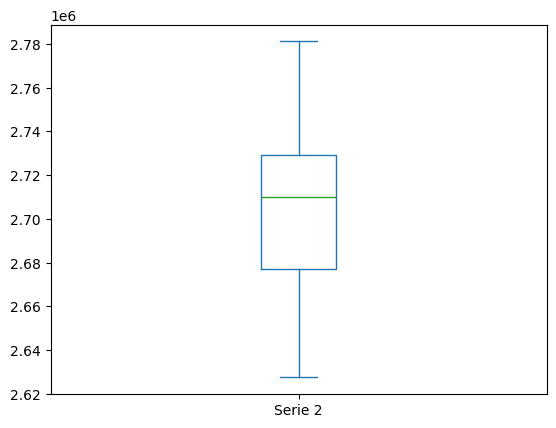

In [18]:
serie_temp['Serie 2'].plot(kind='box')

In [19]:
conversion_date = {'ene':'jan','abr':'apr','ago':'aug','dic':'dec'}

In [20]:
for esp, eng in conversion_date.items():
    serie_temp['Mes'] = serie_temp['Mes'].str.replace(esp, eng)

In [21]:
serie_temp['Mes'] = pd.to_datetime(serie_temp['Mes'], format='%b-%y') 

In [22]:
serie_temp.head(3)

,Mes,Serie 1,Serie 2
0,2016-01-01,130443.0,2673833.0
1,2016-02-01,131391.0,2679656.0
2,2016-03-01,132224.0,2683431.0


In [23]:
serie_temp

,Mes,Serie 1,Serie 2
0,2016-01-01,130443.0,2673833.0
1,2016-02-01,131391.0,2679656.0
2,2016-03-01,132224.0,2683431.0
3,2016-04-01,133336.0,2674095.0
4,2016-05-01,136150.0,2686224.0
...,...,...,...
62,2021-03-01,266599.0,2772285.0
63,2021-04-01,260195.0,2747556.0
64,2021-05-01,266802.0,2763590.0
65,2021-06-01,264802.0,2768877.0


In [24]:
serie_temp.set_index('Mes', inplace=True) 

<Axes: xlabel='Mes'>

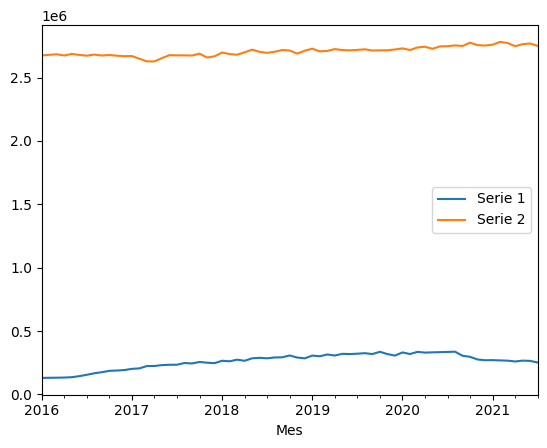

In [25]:
serie_temp.plot()

<Axes: xlabel='Mes'>

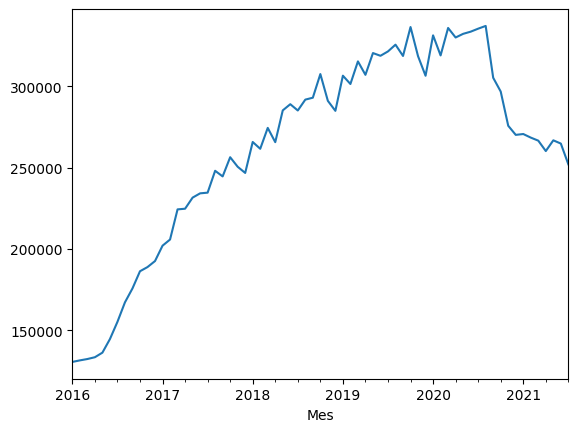

In [26]:
serie_temp['Serie 1'].plot()

<Axes: xlabel='Mes'>

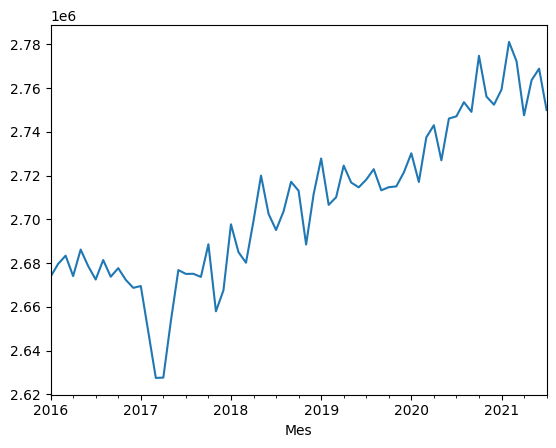

In [27]:
serie_temp['Serie 2'].plot()

In [28]:
forecast_uno = Prophet()
forecast_dos = Prophet()

In [29]:
serie_temp.shape

(67, 2)

In [30]:
serie_temp.head(2)

,Serie 1,Serie 2
Mes,,
2016-01-01,130443.0,2673833.0
2016-02-01,131391.0,2679656.0


In [31]:
serie_temp.reset_index(inplace=True)

In [32]:
serie_temp.head(2)

,Mes,Serie 1,Serie 2
0,2016-01-01,130443.0,2673833.0
1,2016-02-01,131391.0,2679656.0


In [33]:
set_uno , set_dos = serie_temp[['Mes','Serie 1']] ,serie_temp[['Mes','Serie 2']] 

In [34]:
set_uno.rename(columns={'Mes':'ds','Serie 1':'y'},inplace=True)

C:\Users\JMELENDEZ\AppData\Local\Temp\ipykernel_43932\1257036018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_uno.rename(columns={'Mes':'ds','Serie 1':'y'},inplace=True)


In [35]:
set_dos.rename(columns={'Mes':'ds','Serie 2':'y'},inplace=True)

C:\Users\JMELENDEZ\AppData\Local\Temp\ipykernel_43932\1749753432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_dos.rename(columns={'Mes':'ds','Serie 2':'y'},inplace=True)


In [36]:
# size = int(len(serie_temp)*0.85)

In [37]:
# set_uno_train  = set_uno.iloc[:size]

In [38]:
# set_uno_train.head(3)

In [39]:
# set_uno_train.info()

In [40]:
# set_uno_test = set_uno.iloc[size:]

In [41]:
# set_uno_test.tail(10)

In [42]:
# set_uno_test.info()

In [43]:
forecast_uno.fit(set_uno)

11:24:12 - cmdstanpy - INFO - Chain [1] start processing
11:24:12 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# forecast_uno_prueba=forecast_uno.predict(set_uno_test)

In [45]:
# plt.plot(forecast_uno_prueba['ds'],forecast_uno_prueba['yhat'], label='forecast')
# plt.plot(forecast_uno_prueba['ds'],set_uno_test['y'],label='Valor obs')
# # plt.plot(set_uno['ds'],set_uno['y'],label='serie completa')
# plt.legend()
# plt.xlabel('Fecha')
# plt.show()

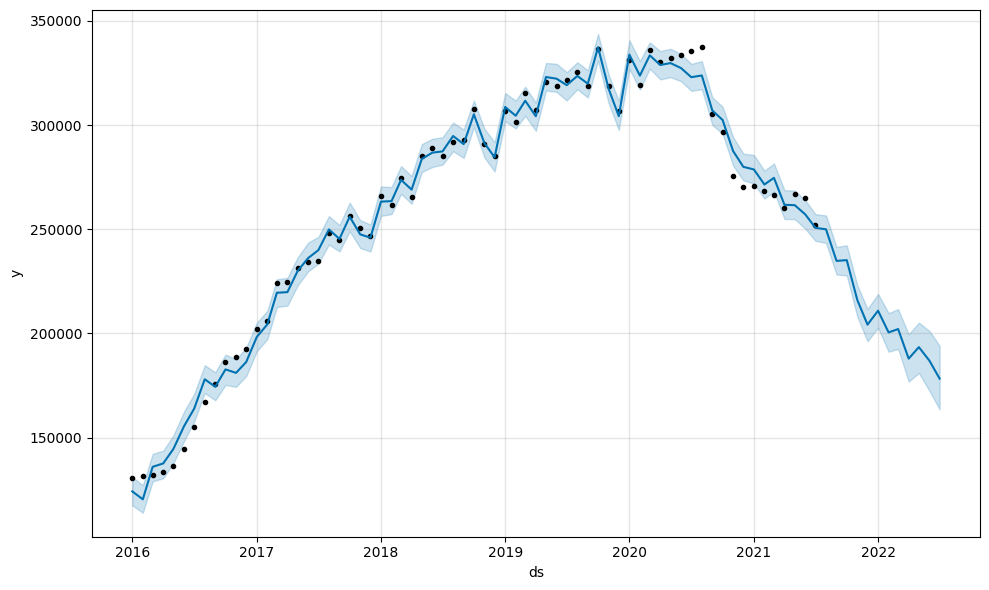

In [46]:
future_one = forecast_uno.make_future_dataframe(12,freq='MS')
prediccion_uno = forecast_uno.predict(future_one)
fig = forecast_uno.plot(prediccion_uno)

In [50]:
prediccion_uno.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [54]:
prediccion_uno[['ds','yhat']].tail(12)

,ds,yhat
67,2021-08-01,249954.136085
68,2021-09-01,234780.157268
69,2021-10-01,235142.510962
70,2021-11-01,216040.896638
71,2021-12-01,204184.930997
72,2022-01-01,210871.673580
73,2022-02-01,200456.404356
74,2022-03-01,202073.682521
75,2022-04-01,187877.796170
76,2022-05-01,193398.133232


In [52]:
forecast_dos.fit(set_dos)

11:32:50 - cmdstanpy - INFO - Chain [1] start processing
11:32:51 - cmdstanpy - INFO - Chain [1] done processing


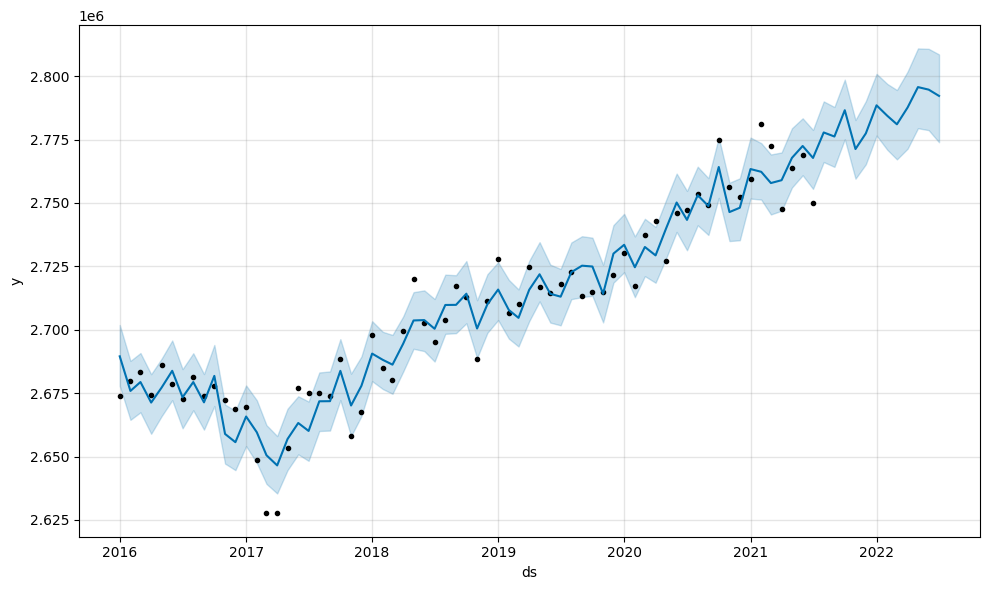

In [53]:
future_two = forecast_dos.make_future_dataframe(12,freq='MS')
prediccion_dos = forecast_dos.predict(future_two)
fig_dos = forecast_dos.plot(prediccion_dos)

In [55]:
prediccion_dos[['ds','yhat']].tail(12)

,ds,yhat
67,2021-08-01,2.777778e+06
68,2021-09-01,2.776181e+06
69,2021-10-01,2.786547e+06
70,2021-11-01,2.771245e+06
71,2021-12-01,2.777418e+06
72,2022-01-01,2.788479e+06
73,2022-02-01,2.784366e+06
74,2022-03-01,2.780999e+06
75,2022-04-01,2.787630e+06
76,2022-05-01,2.795665e+06
